#Self-attention

Self-attention is a mechanism that allows a model to focus on different parts of the input sequence when encoding a particular token, making it especially powerful for tasks like translation, text summarization, and question answering.

#🎯 Why Self-Attention?

In traditional RNNs or LSTMs:

>The model reads tokens sequentially, which makes it hard to capture long-range dependencies.

>LSTMs carry information via hidden states, which can lose context over time.

👉 Self-attention solves this by allowing direct connections between all tokens in a sequence — each word can attend to all other words (including itself) in a single operation.



#⚙️ How Self-Attention Works (Step-by-Step)

Let’s say we have 3 input tokens:

["I", "love", "AI"]

Each token is first converted into an embedding vector.

1. Create Queries (Q), Keys (K), and Values (V)

2. Compute Attention Scores

3. Scale and Normalize (Softmax)

4. Compute Weighted Sum

#🧠 Intuition:

| Token  | Attends To...     | Why                              |
| ------ | ----------------- | -------------------------------- |
| "I"    | "I", "love", "AI" | For context about the sentence   |
| "love" | "I", "love", "AI" | To know who loves what           |
| "AI"   | "love", "I"       | To understand action and subject |

#🔁 Self-Attention vs. Cross-Attention

| Type                | What attends to what?                                                 |
| ------------------- | --------------------------------------------------------------------- |
| **Self-Attention**  | Tokens attend to other tokens **within the same sequence**            |
| **Cross-Attention** | Decoder attends to the **encoder’s outputs** (used in seq2seq models) |



Input: ["I", "love", "AI"]

          ↓

[Embedding → Q, K, V for each token]

          ↓

Compute dot-products (Q · Kᵗ)

          ↓
Softmax to get attention weights

          ↓

Weighted sum with V

          ↓

Final self-attended representation


#📚 Example

In [ ]:
import tensorflow as tf

# Simulated token embeddings (batch=1, seq=3, dim=4)
X = tf.random.normal((1, 3, 4))

# Dense layers to simulate W^Q, W^K, W^V
Q = tf.keras.layers.Dense(4)(X)
K = tf.keras.layers.Dense(4)(X)
V = tf.keras.layers.Dense(4)(X)

# Scaled dot-product attention
attention_scores = tf.matmul(Q, K, transpose_b=True) / tf.math.sqrt(tf.cast(4, tf.float32))
attention_weights = tf.nn.softmax(attention_scores, axis=-1)
output = tf.matmul(attention_weights, V)

print("Self-attention output:", output)


Self-attention output: tf.Tensor(
[[[ 1.6991535   0.71662676 -0.49438468  0.9614433 ]
  [ 1.8622185   0.01368878 -0.31854153  1.2027055 ]
  [ 1.5993102   1.1465191  -0.6041342   0.81261975]]], shape=(1, 3, 4), dtype=float32)


# Contextual Embedding


Contextual embedding refers to word representations that change based on context—the surrounding words in a sentence—unlike traditional embeddings like Word2Vec or GloVe which assign one fixed vector per word regardless of context.

#📌 Example:

| Sentence                                  | Word | Traditional Embedding  | Contextual Embedding                |
| ----------------------------------------- | ---- | ---------------------- | ----------------------------------- |
| "I went to the **bank** to deposit cash." | bank | Same vector for "bank" | Refers to **financial institution** |
| "He sat by the **bank** of the river."    | bank | Same vector for "bank" | Refers to **riverbank**             |


👉 In traditional embeddings, "bank" has the same vector in both sentences.
👉 In contextual embeddings, the vector for "bank" is different in each sentence, because the model understands the context.

#🎯 Why Contextual Embeddings?

Words are polysemous (multiple meanings).

Meaning depends on surrounding words.

Contextual embeddings allow models to capture nuance, syntax, and semantics better.

⚙️ How Are They Generated?
Contextual embeddings are learned by deep neural networks (usually transformers) trained on large corpora using self-supervised tasks.

Popular Models:

| Model                     | Description                                  |
| ------------------------- | -------------------------------------------- |
| **ELMo**                  | First popular contextual model using BiLSTMs |
| **BERT**                  | Transformer-based bidirectional encoder      |
| **GPT**                   | Autoregressive transformer-based model       |
| **RoBERTa**, **T5**, etc. | Improved BERT variants                       |


#Practical: Contextual Embeddings Using Q, K, V

#✅ Objective:
Demonstrate how contextual embeddings work using dot-product attention (no scaling), with custom implementation of query, key, and value logic from scratch.



In [ ]:
#🔧 Step 1:Setup & Imports
pip install numpy

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Step 2: Define Sentences and Vocabulary
sentences = [
    ["he", "sat", "on", "the", "bank", "of", "the", "river"],       # bank = riverbank
    ["she", "went", "to", "the", "bank", "to", "deposit", "cash"]   # bank = financial institution
]

# Build vocabulary
vocab = sorted(set(word for sentence in sentences for word in sentence))
word2idx = {w: i for i, w in enumerate(vocab)}
idx2word = {i: w for w, i in word2idx.items()}
vocab_size = len(vocab)

# Step Step 3: Create Fixed Random Word Embeddings
embedding_dim = 8  # dimension of word vectors
np.random.seed(42)  # reproducibility
word_embeddings = np.random.rand(vocab_size, embedding_dim)

def embed_sentence(sentence):
    return np.array([word_embeddings[word2idx[word]] for word in sentence])

#Step 4: Simple Dot-Product Attention (No Scaling)

def compute_attention(Q, K):
    """Dot product attention scores (without scaling or softmax)"""
    return np.dot(Q, K.T)  # (seq_len, seq_len)

#Step 5: Create Contextual Embedding for Each Word

def get_contextual_embeddings(sentence):
    X = embed_sentence(sentence)
    Q, K, V = X, X, X  # Q = K = V for self-attention

    attention_scores = compute_attention(Q, K)  # raw dot products

    # Normalize scores row-wise (manually instead of softmax)
    attention_weights = attention_scores / np.sum(attention_scores, axis=1, keepdims=True)

    # Weighted sum of value vectors to get contextual embeddings
    contextual_output = np.dot(attention_weights, V)
    return contextual_output, attention_weights

#Step 6: Compare “bank” in Different Contexts

ctx1, weights1 = get_contextual_embeddings(sentences[0])
ctx2, weights2 = get_contextual_embeddings(sentences[1])

bank_idx1 = sentences[0].index("bank")
bank_idx2 = sentences[1].index("bank")

vec1 = ctx1[bank_idx1]
vec2 = ctx2[bank_idx2]

# Cosine similarity
cos_sim = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

print(f"Contextual similarity of 'bank': {cos_sim:.4f}")




Contextual similarity of 'bank': 0.9574


#📝 Summary

| Feature                | Description                    |
| ---------------------- | ------------------------------ |
| Uses BERT              | ❌ No                           |
| Uses Q, K, V           | ✅ Yes                          |
| Uses Scaling / Softmax | ❌ No                           |
| Contextualized Output  | ✅ Demonstrated on `"bank"`     |
| Visualization          | ✅ Attention weights (optional) |


#scaled dot product attention

Scaled Dot-Product Attention is the core mechanism behind the attention modules in Transformer architectures (like those used in BERT, GPT, etc.). It helps determine how much focus (or “attention”) each word in a sequence should give to other words when encoding contextual meaning.

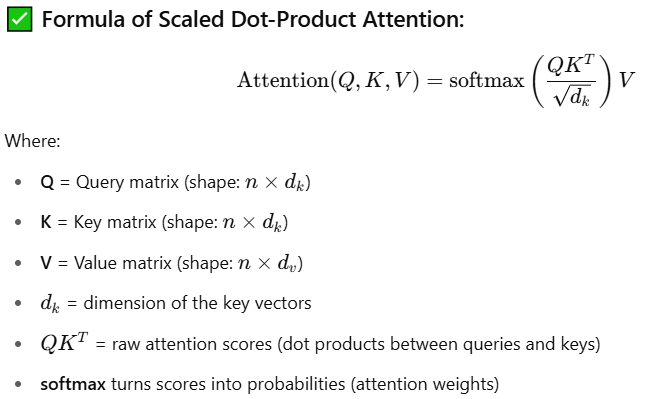

#🧠 What Does It Do?
It computes attention scores between each word and all others in a sentence. The key idea is to:

1.Use the dot product between queries and keys to measure how similar or relevant two words are.

2.Scale the result by
underroot 𝑑
𝑘 to avoid very large values when dimensionality is high.

3.Apply softmax to convert scores into probabilities.

4.Multiply the attention weights with the Value (V) matrix to get the contextualized output.

#🔍 Why Scaling?
Without scaling, large dot products (due to high dimensionality) push softmax into regions with very small gradients.

Scaling helps stabilize gradients and improves training performance.

#🧠 Example Intuition:
Suppose you’re processing the sentence:

>“The cat sat on the mat.”

To compute attention for the word "sat":

>Query: vector for "sat"

>Keys: vectors for all words

>Dot product gives raw relevance of "sat" to all other words

>Scaled dot product + softmax gives how much "sat" should focus on each word

>Then we weigh Value vectors accordingly to get the contextual meaning of "sat".



In [ ]:
import tensorflow as tf

# Define d_k (dimension of the key vectors) - Assuming it's the last dimension of K
# If K is not defined, use a default value or get it from the previous context
# Based on the previous cell hGU4TfBMoSgK, the dimension is 4
d_k = tf.cast(tf.shape(K)[-1], tf.float32)

# Define softmax function
softmax = tf.nn.softmax

# Assuming Q, K, V are already defined as TensorFlow tensors
# If not, you'll need to define them or ensure they are passed into this code

scores = tf.matmul(Q, K, transpose_b=True) / tf.math.sqrt(d_k)
weights = softmax(scores, axis=-1)
output = tf.matmul(weights, V)

print("Scaled dot product attention output:", output)

Scaled dot product attention output: tf.Tensor(
[[[ 1.6991535   0.71662676 -0.49438468  0.9614433 ]
  [ 1.8622185   0.01368878 -0.31854153  1.2027055 ]
  [ 1.5993102   1.1465191  -0.6041342   0.81261975]]], shape=(1, 3, 4), dtype=float32)


#🔁 Comparison to Basic Dot Product:

| Feature                 | Dot Product Attention  | Scaled Dot Product Attention |
| ----------------------- | ---------------------- | ---------------------------- |
| Uses scaling factor?    | ❌ No                   | ✅ Yes, by $\sqrt{d_k}$       |
| Training stability      | 🚫 Poor with high dims | ✅ More stable                |
| Common in Transformers? | ❌ Rare                 | ✅ Yes (standardized)         |


#multi-head attention

Multi-Head Attention is an advanced extension of the basic Scaled Dot-Product Attention mechanism that allows the model to attend to different parts of the input sequence simultaneously using multiple sets of Queries, Keys, and Values (i.e., multiple “heads”).

It is one of the core components of the Transformer architecture.

#🔁 Why Not Just One Attention?
One single attention head may not capture all aspects of linguistic relationships (e.g., word position, syntactic structure, meaning, etc.).

So, multi-head attention allows the model to learn multiple attention patterns in parallel.

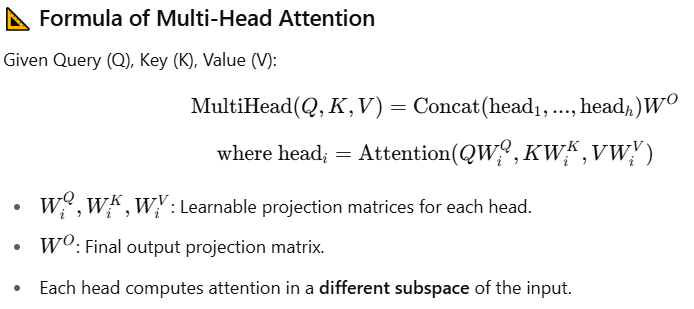

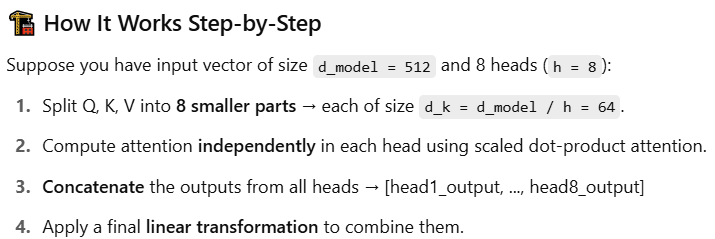

| Head # | Might focus on...             |
| ------ | ----------------------------- |
| Head 1 | Grammatical structure         |
| Head 2 | Long-distance dependencies    |
| Head 3 | Positional or syntactic roles |

✅ Benefits

Parallel processing — faster and efficient on GPUs.

Rich representation — different heads learn different features.

Modular and scalable — can increase heads without changing architecture much.



In [ ]:
import numpy as np

# Initialize parameters
d_model = 8   # total dimension of model
num_heads = 2
seq_len = 4
d_k = d_v = d_model // num_heads

# Sample input: 4 tokens, each of 8 dimensions
x = np.random.rand(seq_len, d_model)

# Initialize weights for Q, K, V for each head
Wq = [np.random.rand(d_model, d_k) for _ in range(num_heads)]
Wk = [np.random.rand(d_model, d_k) for _ in range(num_heads)]
Wv = [np.random.rand(d_model, d_v) for _ in range(num_heads)]

# Output projection matrix
Wo = np.random.rand(d_model, d_model)

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / np.sum(e_x, axis=-1, keepdims=True)

def attention(Q, K, V):
    # Dot product (without scaling)
    scores = Q @ K.T
    weights = softmax(scores)
    return weights @ V

# Multi-head attention
heads = []
for i in range(num_heads):
    Q = x @ Wq[i]
    K = x @ Wk[i]
    V = x @ Wv[i]

    head_output = attention(Q, K, V)
    heads.append(head_output)

# Concatenate heads
multihead_output = np.concatenate(heads, axis=-1)

# Final output projection
final_output = multihead_output @ Wo

print("Input:\n", x)
print("\nMulti-Head Output:\n", final_output)


Input:
 [[0.52273283 0.42754102 0.02541913 0.10789143 0.03142919 0.63641041
  0.31435598 0.50857069]
 [0.90756647 0.24929223 0.41038292 0.75555114 0.22879817 0.07697991
  0.28975145 0.16122129]
 [0.92969765 0.80812038 0.63340376 0.87146059 0.80367208 0.18657006
  0.892559   0.53934224]
 [0.80744016 0.8960913  0.31800347 0.11005192 0.22793516 0.42710779
  0.81801477 0.86073058]]

Multi-Head Output:
 [[11.91813955  9.77831456 10.21241426  7.84577322  9.69437263 11.83741969
  10.88766313 12.70843947]
 [12.07611717  9.92332516 10.35571037  7.93753484  9.82427742 11.98457753
  11.00226592 12.86273009]
 [12.28455582 10.11953657 10.54580279  8.05537771  9.99439671 12.17390998
  11.14300247 13.05819826]
 [12.2206303  10.05844323 10.48728854  8.01978525  9.94240488 12.11670982
  11.10174327 12.99974857]]


#📌 Summary

| Concept        | Description                                          |
| -------------- | ---------------------------------------------------- |
| Attention Head | One scaled dot-product attention mechanism           |
| Multi-head     | Multiple heads with separate projections for Q, K, V |
| Output         | Concatenation of heads + final linear transformation |
| Goal           | Capture multiple views of context in parallel        |


#positional encoding

Positional Encoding is a technique used in Transformer models (like BERT, GPT) to give the model a sense of word order or position in a sequence, because Transformers have no built-in notion of sequence or time (unlike RNNs/LSTMs).

#🔍 Why Do We Need It?
Transformers process tokens in parallel, not sequentially like RNNs. So they don’t automatically know the position of a word in a sentence like:

>"I love AI" vs "AI loves I"

To preserve order information, we add positional encodings to the input embeddings.

#🧠 How Positional Encoding Works
Each position in the input sequence is assigned a vector that gets added to the token embedding. These vectors follow a deterministic sinusoidal pattern that lets the model learn relative and absolute position relationships.

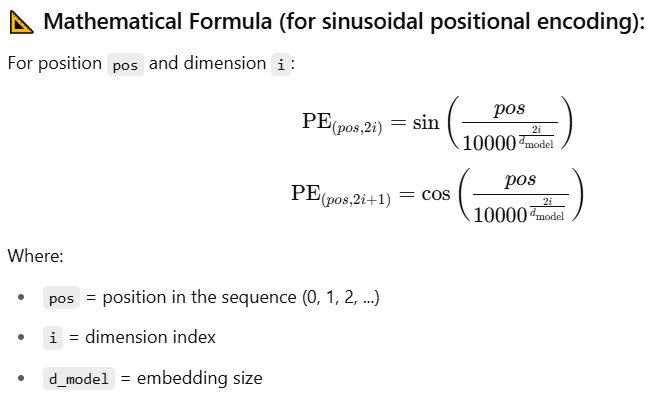

#🧠 Intuition Behind Sin/Cos Pattern
Sinusoids allow the model to easily learn relative positions (e.g., position A is 3 steps after position B).

The model can extrapolate to longer sequences it hasn't seen.

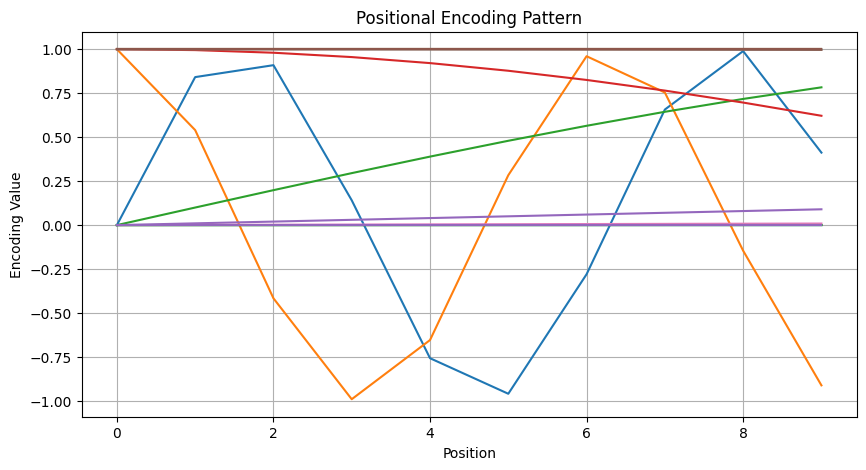

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def positional_encoding(seq_len, d_model):
    PE = np.zeros((seq_len, d_model))
    for pos in range(seq_len):
        for i in range(0, d_model, 2):
            PE[pos, i] = np.sin(pos / (10000 ** ((2 * i)/d_model)))
            if i + 1 < d_model:
                PE[pos, i+1] = np.cos(pos / (10000 ** ((2 * i)/d_model)))
    return PE

# Demo: 10 positions with 16-dim encoding
pos_enc = positional_encoding(10, 16)

plt.figure(figsize=(10, 5))
plt.plot(pos_enc)
plt.title("Positional Encoding Pattern")
plt.xlabel("Position")
plt.ylabel("Encoding Value")
plt.grid(True)
plt.show()


#Layer Normalization

Layer Normalization is a technique used to normalize the inputs across the features of a single data point (i.e., across the neurons in a layer). It stabilizes and accelerates the training of deep neural networks, especially Transformers.

#🔍 Why Do We Use It?
>In deep networks, the distribution of activations can shift, making training unstable (known as internal covariate shift).

>LayerNorm helps maintain consistent distributions of activations throughout training.

>It plays a crucial role in Transformers (used after sub-layers like attention or feed-forward).

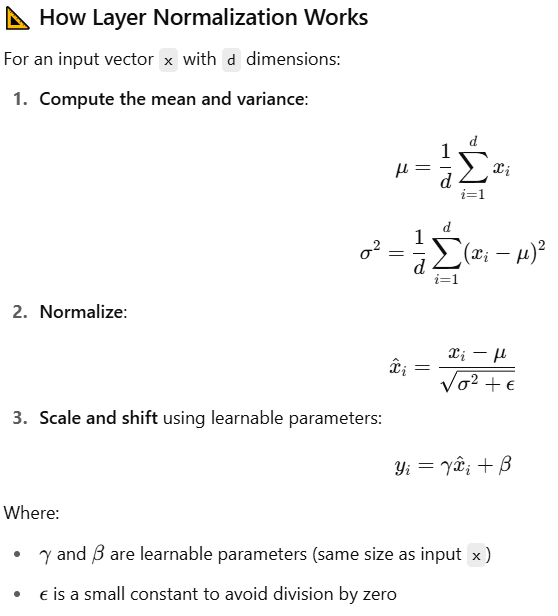

#Layer Normalization on a Simple Input

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import LayerNormalization

# Example input: batch of 2 samples, each with 4 features
x = tf.constant([[1.0, 2.0, 3.0, 4.0],
                 [2.0, 3.0, 4.0, 5.0]])

# Apply Layer Normalization
layer_norm = LayerNormalization(axis=-1)
output = layer_norm(x)

print("Original:\n", x.numpy())
print("\nLayer Normalized:\n", output.numpy())


Original:
 [[1. 2. 3. 4.]
 [2. 3. 4. 5.]]

Layer Normalized:
 [[-1.3411043  -0.44703472  0.44703484  1.3411045 ]
 [-1.3411044  -0.44703484  0.44703484  1.3411043 ]]


✅ Output explanation:

The mean and variance are computed per sample (row).

The output will have zero mean and unit variance (before scaling by gamma and shifting by beta).



#Using Layer Normalization in a Keras Model
Let's create a small Transformer-like block with LayerNormalization.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Dummy input: batch of 10 sequences, each of length 5, with 8 features
input_tensor = tf.random.normal(shape=(10, 5, 8))

# Define a simple model with Layer Normalization
inputs = tf.keras.Input(shape=(5, 8))
x = layers.Dense(16, activation='relu')(inputs)
x = LayerNormalization()(x)  # Normalizing across features
x = layers.Dense(8)(x)
x = LayerNormalization()(x)  # Again normalize after transformation
model = models.Model(inputs=inputs, outputs=x)

# Forward pass
output_tensor = model(input_tensor)
print("Output shape:", output_tensor.shape)


Output shape: (10, 5, 8)


#🔁 Difference Between LayerNorm and BatchNorm

| Feature                 | **LayerNorm**                   | **BatchNorm**                            |
| ----------------------- | ------------------------------- | ---------------------------------------- |
| Normalizes over         | Features (per sample)           | Batch dimension (per feature)            |
| Use in NLP/Transformers | ✅ Yes                           | 🚫 No (less effective)                   |
| Batch-size dependency   | ❌ No                            | ✅ Yes                                    |
| Sequence-friendly       | ✅ Great for RNNs & Transformers | ❌ Not suitable for variable-length input |


#✅ Summary
LayerNorm is used after each residual connection in Transformers.

It is independent of batch size — great for NLP and variable-length inputs.

In Keras, it can be used just like any other layer.

#self-masked attention


>Self-masked attention (commonly referred to as masked self-attention) is a variant of self-attention used primarily in language models like the Transformer decoder (e.g., GPT) during training or inference on sequential data (like text), where future tokens are masked out to preserve the auto-regressive property.

>It’s a mechanism where, during attention calculation, a mask is applied to ensure that each position in a sequence can only attend to earlier positions (including itself) — not future tokens.

🔒 Purpose:

To prevent "cheating" — i.e., the model should not see future tokens while predicting the current word during training.

📌 Example Use Case

Let’s say you're training a language model to predict the next word in this sentence:

Input: "The cat sat on"

You train it to predict:

→ "cat" from "The"

→ "sat" from "The cat"

→ "on" from "The cat sat"

❌ Without masking:

The model could attend to the full sentence "The cat sat on" — including future words — which makes training unrealistic.

✅ With masking:

The model can only attend to words before or at its current position.

#How It Works (Conceptually)
In self-attention, we calculate:

Attention(Q, K, V) = softmax(QKᵀ / √d) × V

In masked self-attention, we apply a mask to the QKᵀ matrix:

>Set the upper triangular (future positions) to −∞

>After applying softmax(), those positions become zero

#🔧 Visualization
If seq_len = 4, the mask looks like this:

[

 [0, -∞, -∞, -∞],

 [0,  0, -∞, -∞],

 [0,  0,  0, -∞],

 [0,  0,  0,  0]

]





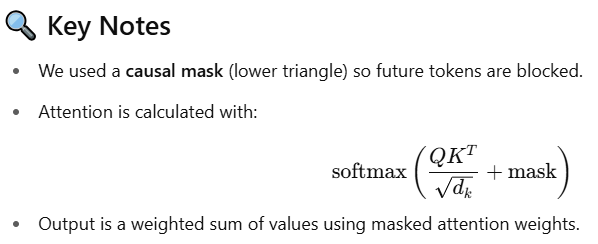

In [ ]:
#🎯 Goal:
#To implement masked self-attention on a toy input sequence using Query, Key, and Value, with a causal mask applied.

#✅ Step-by-Step Code (TensorFlow)

import tensorflow as tf
import numpy as np

# Sample input (batch_size=1, seq_len=4, embedding_dim=8)
sample_input = tf.random.uniform((1, 4, 8))  # [B, T, D]
print("Sample Input Shape:", sample_input.shape)



Sample Input Shape: (1, 4, 8)


In [ ]:

#🔹 Create Query, Key, and Value projections

# Projection layers for Q, K, V
d_model = 8

query_dense = tf.keras.layers.Dense(d_model)
key_dense   = tf.keras.layers.Dense(d_model)
value_dense = tf.keras.layers.Dense(d_model)

Q = query_dense(sample_input)  # [B, T, D]
K = key_dense(sample_input)
V = value_dense(sample_input)

print("Q shape:", Q.shape)



Q shape: (1, 4, 8)


In [ ]:
#🔹 Scaled Dot Product Attention with Causal Mask

def masked_self_attention(Q, K, V):
    matmul_qk = tf.matmul(Q, K, transpose_b=True)  # [B, T, T]

    # Scale scores
    dk = tf.cast(tf.shape(K)[-1], tf.float32)
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

    # Create a lower triangular mask [1, 1, T, T]
    seq_len = tf.shape(Q)[1]
    mask = tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)  # Lower triangle
    mask = 1 - mask  # Invert: 1 for masked positions

    # Add -inf to masked positions
    scaled_attention_logits += (mask * -1e9)

    # Apply softmax
    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)  # [B, T, T]

    # Multiply by Value
    output = tf.matmul(attention_weights, V)  # [B, T, D]
    return output, attention_weights




In [ ]:
#🔹 Apply the masked self-attention

output, attn_weights = masked_self_attention(Q, K, V)

print("Output shape:", output.shape)
print("Attention Weights shape:", attn_weights.shape)


Output shape: (1, 4, 8)
Attention Weights shape: (1, 4, 4)


In [ ]:
# Check Outputs
print("Attention Weights:\n", tf.round(attn_weights[0] * 100) / 100)


Attention Weights:
 tf.Tensor(
[[1.   0.   0.   0.  ]
 [0.56 0.44 0.   0.  ]
 [0.33 0.26 0.41 0.  ]
 [0.27 0.23 0.26 0.24]], shape=(4, 4), dtype=float32)


#🧠 Summary > theory based

| Feature        | Description                              |
| -------------- | ---------------------------------------- |
| Purpose        | Prevent model from seeing future tokens  |
| Used in        | Decoder-side (GPT, Transformer decoders) |
| Effect         | Enforces causal/left-to-right prediction |
| Implementation | Applies mask before softmax in attention |

#🧠 Summary > practical based

| Concept        | Implementation                          |
| -------------- | --------------------------------------- |
| Input          | Random sequence of shape `[1, 4, 8]`    |
| Mask           | Causal mask using `tf.linalg.band_part` |
| Attention Type | Self-attention with causal masking      |
| Library Used   | TensorFlow and Keras                    |


#Cross attention

Cross-attention is a mechanism where the query comes from one sequence, and the key and value come from another sequence.


#📘 Where is Cross-Attention Used?
Cross-attention is a core component of encoder-decoder architectures, especially in:

🔤 Machine Translation (e.g., English ➡ Hindi)

🎧 Speech recognition

🖼 Image captioning

🧠 Multimodal models like GPT-4 with vision, where text attends to image embeddings

#💡 Self-Attention vs. Cross-Attention

| Feature     | Self-Attention                         | Cross-Attention                   |
| ----------- | -------------------------------------- | --------------------------------- |
| Query       | From same input as key/value           | From decoder input                |
| Key & Value | From same input                        | From encoder output               |
| Use Case    | Encoder/Decoder hidden representations | Decoder using encoder’s knowledge |

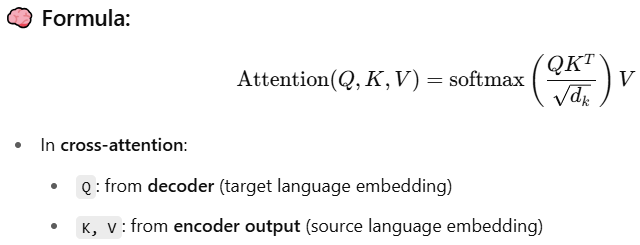

#📊 Real-Life Example:
English to Hindi translation

Encoder processes "I love you" and outputs vector representations.

Decoder processes "Main" (Hindi word for "I") and attends to encoder outputs using cross-attention to decide the next word (maybe "tumse").

#📌 Summary:

| Term            | Meaning                                                                  |
| --------------- | ------------------------------------------------------------------------ |
| Cross-Attention | Allows one sequence (e.g., decoder) to attend to another (e.g., encoder) |
| Critical for    | Seq2Seq tasks: translation, summarization, captioning                    |
| Difference      | Queries from decoder; Keys & Values from encoder                         |


✅ Objective:

Implement a simple cross-attention layer to show how decoder queries attend to encoder outputs.

🧪 Prerequisites:

In [ ]:
#📘 Step-by-Step Code with Comments
import tensorflow as tf
from tensorflow.keras.layers import Layer
import numpy as np

# Step 1: Define the Cross-Attention Layer
class CrossAttention(Layer):
    def __init__(self, d_model):
        super(CrossAttention, self).__init__()
        self.d_model = d_model
        self.query_dense = tf.keras.layers.Dense(d_model)
        self.key_dense = tf.keras.layers.Dense(d_model)
        self.value_dense = tf.keras.layers.Dense(d_model)
        self.softmax = tf.keras.layers.Softmax(axis=-1)

    def call(self, query_input, encoder_output):
        # Project query, key, value
        Q = self.query_dense(query_input)       # Shape: (batch_size, tgt_seq_len, d_model)
        K = self.key_dense(encoder_output)      # Shape: (batch_size, src_seq_len, d_model)
        V = self.value_dense(encoder_output)    # Shape: (batch_size, src_seq_len, d_model)

        # Step 2: Compute dot product attention
        attention_scores = tf.matmul(Q, K, transpose_b=True)   # (batch, tgt_seq_len, src_seq_len)
        scale = tf.math.sqrt(tf.cast(tf.shape(K)[-1], tf.float32))
        attention_scores = attention_scores / scale

        attention_weights = self.softmax(attention_scores)     # Softmax over src_seq_len

        output = tf.matmul(attention_weights, V)  # (batch, tgt_seq_len, d_model)
        return output, attention_weights

# Step 3: Simulate inputs
batch_size = 2
src_seq_len = 5
tgt_seq_len = 3
d_model = 4

# Encoder output (source sequence) – pretend it's the output from an encoder
encoder_output = tf.random.uniform((batch_size, src_seq_len, d_model), dtype=tf.float32)

# Decoder input (target queries) – pretend it's decoder's input so far
decoder_query = tf.random.uniform((batch_size, tgt_seq_len, d_model), dtype=tf.float32)

# Step 4: Apply Cross-Attention
cross_attention = CrossAttention(d_model)
attended_output, attention_weights = cross_attention(decoder_query, encoder_output)

# Step 5: Print results
print("Encoder Output:\n", encoder_output.numpy())
print("\nDecoder Query:\n", decoder_query.numpy())
print("\nAttention Weights:\n", attention_weights.numpy())
print("\nCross-Attended Output:\n", attended_output.numpy())


Encoder Output:
 [[[0.70519364 0.75218844 0.09283793 0.22909534]
  [0.62181914 0.11706734 0.63167965 0.49341702]
  [0.23271799 0.3371346  0.6239165  0.7134162 ]
  [0.53516567 0.04455233 0.02351832 0.80305934]
  [0.7280345  0.31390476 0.5602242  0.31491172]]

 [[0.36776102 0.99293363 0.10859895 0.33093488]
  [0.09340215 0.7699301  0.09826553 0.90156746]
  [0.11091852 0.26158953 0.810356   0.6923454 ]
  [0.46685708 0.9233805  0.7083317  0.14795434]
  [0.59907866 0.3867743  0.23868036 0.19554019]]]

Decoder Query:
 [[[0.834435   0.3091936  0.5525454  0.72072613]
  [0.85559094 0.76263046 0.7965106  0.9411291 ]
  [0.58716786 0.15163326 0.02274215 0.24089134]]

 [[0.7503835  0.7808248  0.7803514  0.55384004]
  [0.02370691 0.4258058  0.45315623 0.29627502]
  [0.66048455 0.58190346 0.75171185 0.76106226]]]

Attention Weights:
 [[[0.1940355  0.21238531 0.18835357 0.19155692 0.21366873]
  [0.21232405 0.20387278 0.18143854 0.18924391 0.21312074]
  [0.19798928 0.20370662 0.20219362 0.19199802 0.20

#📌 Output (example):
You'll see:

Encoder output

Decoder query input

Attention weight matrix (shows how target positions attend to source tokens)

Final attended output

#🔁 Summary

| Concept     | Layer/Step                                                       |
| ----------- | ---------------------------------------------------------------- |
| Query       | Decoder input                                                    |
| Key & Value | Encoder output                                                   |
| Purpose     | Decoder attends to encoder output to generate relevant next word |



# 🔧 Transformer Architecture from Scratch – Practical
🎯 Goal:

Build a mini transformer model from scratch that can be used for sequence-to-sequence tasks like English to Hindi translation or simple toy tasks.

🧱 Architecture Components

We’ll implement:

1.Positional Encoding

2.Scaled Dot-Product Attention

3.Multi-Head Attention

4.Feed Forward Network

5.Encoder Layer

6.Decoder Layer

7.Complete Transformer

#✅ Step-by-Step Code

🔹 Imports

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Layer, Dense, LayerNormalization, Dropout, Embedding
from tensorflow.keras.models import Model


#🔹 Positional Encoding

In [ ]:
def get_angles(pos, i, d_model):
    angles = pos / np.power(10000, (2 * (i//2)) / np.float32(d_model))
    return angles

def positional_encoding(position, d_model):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                            np.arange(d_model)[np.newaxis, :],
                            d_model)

    # apply sin to even indices; cos to odd indices
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    pos_encoding = angle_rads[np.newaxis, ...]
    return tf.cast(pos_encoding, dtype=tf.float32)


#🔹 Scaled Dot-Product Attention

In [ ]:
def scaled_dot_product_attention(q, k, v, mask):
    matmul_qk = tf.matmul(q, k, transpose_b=True)  # (..., seq_len_q, seq_len_k)
    dk = tf.cast(tf.shape(k)[-1], tf.float32)
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

    if mask is not None:
        scaled_attention_logits += (mask * -1e9)  # large negative value

    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)
    output = tf.matmul(attention_weights, v)  # (..., seq_len_q, depth_v)
    return output, attention_weights


#🔹 Multi-Head Attention Layer

In [ ]:
class MultiHeadAttention(Layer):
    def __init__(self, d_model, num_heads):
        super().__init__()
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0
        self.depth = d_model // self.num_heads

        self.Wq = Dense(d_model)
        self.Wk = Dense(d_model)
        self.Wv = Dense(d_model)

        self.dense = Dense(d_model)

    def split_heads(self, x, batch_size):
        # (batch_size, seq_len, num_heads, depth)
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, v, k, q, mask):
        batch_size = tf.shape(q)[0]

        q = self.Wq(q)
        k = self.Wk(k)
        v = self.Wv(v)

        q = self.split_heads(q, batch_size)
        k = self.split_heads(k, batch_size)
        v = self.split_heads(v, batch_size)

        scaled_attention, _ = scaled_dot_product_attention(q, k, v, mask)
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  # (batch, seq_len, d_model)

        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.d_model))
        return self.dense(concat_attention)


#🔹 Feed Forward Network

In [ ]:
def point_wise_feed_forward_network(d_model, dff):
    return tf.keras.Sequential([
        Dense(dff, activation='relu'),  # (batch_size, seq_len, dff)
        Dense(d_model)  # (batch_size, seq_len, d_model)
    ])


#🔹 Encoder Layer

In [ ]:
class EncoderLayer(Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super().__init__()
        self.mha = MultiHeadAttention(d_model, num_heads)
        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)

        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, x, training, mask):
        attn_output = self.mha(x, x, x, mask)  # Self-attention
        out1 = self.layernorm1(x + self.dropout1(attn_output, training=training))

        ffn_output = self.ffn(out1)
        out2 = self.layernorm2(out1 + self.dropout2(ffn_output, training=training))

        return out2



#🔹 Decoder Layer

In [ ]:
class DecoderLayer(Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super().__init__()
        self.mha1 = MultiHeadAttention(d_model, num_heads)
        self.mha2 = MultiHeadAttention(d_model, num_heads)

        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.layernorm3 = LayerNormalization(epsilon=1e-6)

        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)
        self.dropout3 = Dropout(rate)

    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):
        attn1 = self.mha1(x, x, x, look_ahead_mask)
        out1 = self.layernorm1(x + self.dropout1(attn1, training=training))

        attn2 = self.mha2(enc_output, enc_output, out1, padding_mask)
        out2 = self.layernorm2(out1 + self.dropout2(attn2, training=training))

        ffn_output = self.ffn(out2)
        out3 = self.layernorm3(out2 + self.dropout3(ffn_output, training=training))

        return out3


#🔹 Transformer Model (Encoder + Decoder)

In [ ]:
class Transformer(Model):
    def __init__(self, num_layers, d_model, num_heads, dff,
                 input_vocab_size, target_vocab_size,
                 pe_input, pe_target, rate=0.1):
        super().__init__()

        self.encoder_embedding = Embedding(input_vocab_size, d_model)
        self.decoder_embedding = Embedding(target_vocab_size, d_model)

        self.pos_encoding_input = positional_encoding(pe_input, d_model)
        self.pos_encoding_target = positional_encoding(pe_target, d_model)

        self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate) for _ in range(num_layers)]
        self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate) for _ in range(num_layers)]

        self.dropout_enc = Dropout(rate)
        self.dropout_dec = Dropout(rate)

        self.final_layer = Dense(target_vocab_size)

    def call(self, inp, tar, training, enc_padding_mask, look_ahead_mask, dec_padding_mask):
        seq_len_inp = tf.shape(inp)[1]
        seq_len_tar = tf.shape(tar)[1]

        # Encoder
        x = self.encoder_embedding(inp) + self.pos_encoding_input[:, :seq_len_inp, :]
        x = self.dropout_enc(x, training=training)
        for layer in self.enc_layers:
            x = layer(x, training, enc_padding_mask)
        enc_output = x

        # Decoder
        y = self.decoder_embedding(tar) + self.pos_encoding_target[:, :seq_len_tar, :]
        y = self.dropout_dec(y, training=training)
        for layer in self.dec_layers:
            y = layer(y, enc_output, training, look_ahead_mask, dec_padding_mask)

        final_output = self.final_layer(y)
        return final_output
